<a href="https://colab.research.google.com/github/jackieeee3/MATH-455/blob/Homework-1/Darcy_Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Newton's Method


Use Your Newton's method code to help address the investigation below.

A crucial quantity in pipeline design is the pressure drop due to friction under turbulent flow. The pressure drop per unit length is described by the *Darcy number f*, a unitless number that satisfies the empirical *Colebrook equation*

$$\frac{1}{\sqrt{f}} = -2 \log_{10}(\frac{\epsilon}{3.7D} + \frac{2.51}{Re\sqrt{f}})$$

where *D* is the inside pipe diameter, $\epsilon$ is the roughness height of the pipe interior, and *Re* is the Reynolds number of the flow. (The Reynolds number is another unitless number, the ratio between the inertial and viscous forces. When the viscous forces are small in comparison to inertial forces, the flow is considered turbulent. Flows in pipes are considered turbulent when *Re* > 4000).

In [34]:
import numpy as np
import sympy as sp
import math
from matplotlib import pyplot as plt
from ipywidgets import interactive, fixed

In [35]:
# Fixed-Point Iteration
# Computes approximate solution of g(x) = x
# Input: starting guess p0,
#        number of steps k
# Output: Approximate solution pn

# Define the variable
x = sp.symbols('x')

# Define the expression
# This symbolic definition was causing issues, I will use numerical functions directly
# g_expr = -2 * sp.log(((0.0002  /(3.7 * 0.3)) + (2.51 / (100000 * sp.sqrt(x)))), 10) - (1 / sp.sqrt(x))

# Compute the derivative
# dg_expr = sp.diff(expr, x)

# Convert to numeric function
# g = sp.lambdify(x, g_expr, 'numpy')
# d = sp.lambdify(x, dg_expr, 'numpy')

# Define Newton's Method

def newton(p0,k):

    # initialize
    pn = np.zeros(k+1)

    pn[0] = p0
    print("n = ",0,":","pn = ",pn[0])
    for i in range(k):
        # Check for non-positive values before calculating the next iteration
        if pn[i] <= 0:
            print("Newton's method diverged or encountered invalid input.")
            break
        pn[i+1] = pn[i] - g(pn[i]) / d(pn[i])
        print("n = ",i+1,":","pn = ",pn[i+1])

    return pn

$$\frac{1}{\sqrt{f}} = -2 \log_{10}(\frac{\epsilon}{3.7D} + \frac{2.51}{Re\sqrt{f}})$$

i. For *D* = 0.3 m, $\epsilon$ = 0.0002 m, and *Re* = $10^5$, use Newton's method to calculate the Darcy number *f*.

$$0 = -2\log_{10}(\frac{0.0002}{3.7*0.3} + \frac{2.51}{100000 * \sqrt{f}}) - \frac{1}{\sqrt{f}}$$

In [36]:
# Function for which fixed point is needed.
def g(x):
    # Ensure the argument to log10 and sqrt is positive
    if x <= 0:
        return np.nan
    gvalue = -2 * np.log10(((0.0002  /(3.7 * 0.3)) + (2.51 / (100000 * np.sqrt(x))))) - (1 / np.sqrt(x))
    return gvalue

def d(x):
    # Ensure the argument to sqrt is positive
    if x <= 0:
        return np.nan
    # Corrected derivative calculation (numerical)
    dvalue = (1/(2*x**(3/2))) - (5.02e-5)/((0.00018018018018018*np.sqrt(x) + 2.51e-5)*x)
    return dvalue

# Use a smaller initial guess, as f is typically a small positive number
newton(0.1, 12)

n =  0 : pn =  0.1
n =  1 : pn =  -0.31352907824078424
Newton's method diverged or encountered invalid input.


array([ 0.1       , -0.31352908,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

ii. For *D* and $\epsilon$ fixed to the values given above, calculate the Darcy number for several Reynolds numbers *Re* between $10^4$ and $10^8$. Summarize your results in a plot of the Darcy numer versus Reynolds number (hint: use a log scale for the horizontal axis).

Now I will calculate the Darcy number for a range of Reynolds numbers between $10^4$ and $10^8$ using the Newton's method function.

In [30]:
# Generate a range of Reynolds numbers
reynolds_numbers = np.logspace(4, 8, 50)  # Generate 50 points logarithmically between 10^4 and 10^8

# Calculate Darcy number for each Reynolds number
darcy_numbers = []
for re in reynolds_numbers:
    # Define the functions g and d for the current Reynolds number
    def g(x):
        if x <= 0:
            return np.nan
        return -2 * np.log10(((0.0002  /(3.7 * 0.3)) + (2.51 / (re * np.sqrt(x))))) - (1 / np.sqrt(x))

    def d(x):
        if x <= 0:
            return np.nan
        # Derivative of -2 * log10(A + B/sqrt(x)) - 1/sqrt(x)
        # where A = epsilon/(3.7*D) and B = 2.51/Re
        # d/dx (-2 * log10(A + B*x^(-1/2)) - x^(-1/2))
        # = -2 * (1 / (A + B*x^(-1/2))) * (log10(e)) * B * (-1/2) * x^(-3/2) - (-1/2) * x^(-3/2)
        # = (log10(e) * B * x^(-3/2)) / (A + B*x^(-1/2)) + (1/2) * x^(-3/2)
        # Substitute A = 0.0002/(3.7*0.3) and B = 2.51/re
        A = 0.0002/(3.7*0.3)
        B = 2.51/re
        log10_e = math.log10(math.e)
        return (log10_e * B * x**(-3/2)) / (A + B*x**(-1/2)) + (1/2) * x**(-3/2)


    # Use a small initial guess for f, as it is typically small
    f_initial_guess = 0.02 # A reasonable starting point for turbulent flow
    try:
        # Run Newton's method for a few iterations
        f_approximation = newton(f_initial_guess, 10)[-1] # Get the last approximation
        darcy_numbers.append(f_approximation)
    except:
        darcy_numbers.append(np.nan) # Append NaN if Newton's method fails

n =  0 : pn =  0.02
n =  1 : pn =  0.028414516527655483
n =  2 : pn =  0.03161227936546229
n =  3 : pn =  0.031890835971543435
n =  4 : pn =  0.031892621116220675
n =  5 : pn =  0.03189262118849171
n =  6 : pn =  0.03189262118849172
n =  7 : pn =  0.03189262118849172
n =  8 : pn =  0.03189262118849172
n =  9 : pn =  0.03189262118849172
n =  10 : pn =  0.03189262118849172
n =  0 : pn =  0.02
n =  1 : pn =  0.027681477458081517
n =  2 : pn =  0.03030890276062488
n =  3 : pn =  0.030500405288323613
n =  4 : pn =  0.03050128572871831
n =  5 : pn =  0.030501285747137577
n =  6 : pn =  0.030501285747137584
n =  7 : pn =  0.03050128574713759
n =  8 : pn =  0.03050128574713759
n =  9 : pn =  0.03050128574713759
n =  10 : pn =  0.03050128574713759
n =  0 : pn =  0.02
n =  1 : pn =  0.02696301175673263
n =  2 : pn =  0.029091495598715537
n =  3 : pn =  0.029219604531663557
n =  4 : pn =  0.029220015412854215
n =  5 : pn =  0.029220015417050462
n =  6 : pn =  0.029220015417050462
n =  7 : pn =  0

Now I will plot the Darcy number versus Reynolds number.

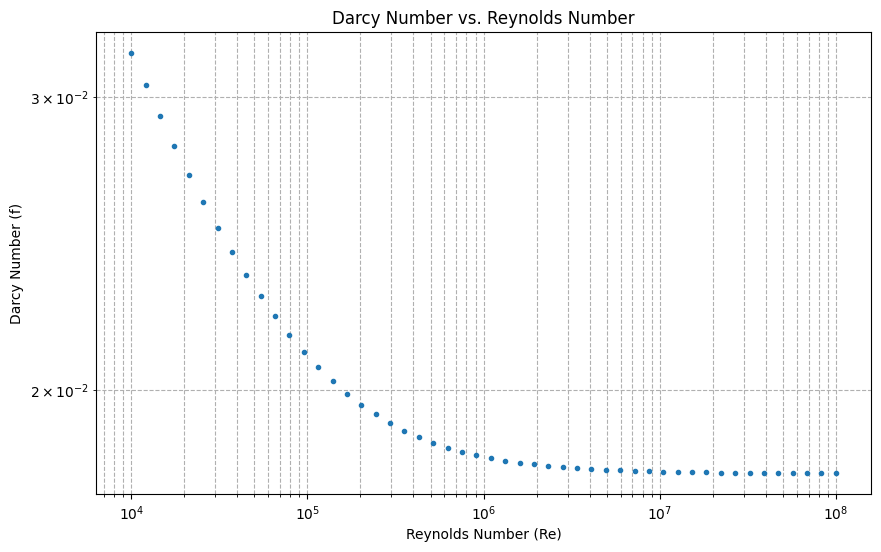

In [31]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.loglog(reynolds_numbers, darcy_numbers, '.') # Use loglog scale for both axes and markers for points
plt.xlabel("Reynolds Number (Re)")
plt.ylabel("Darcy Number (f)")
plt.title("Darcy Number vs. Reynolds Number")
plt.grid(True, which="both", ls="--")
plt.show()